## 七月在线机器学习实训营三期第六周(机器学习)考试
#### 考试说明:
- 起止时间：请同学在2018年3月16日至3月18日期间完成，最晚提交时间本周日（3月18日24时之前）结束，<b>逾期不接受补考,该考试分数计入平时成绩</b>
- 考试方式：请同学<font color=red><b>拷贝</b></font>该试卷至自己姓名的目录后，将文件更名为同学姓名拼音-exam6后，进行作答。例如wangwei-exam6
- 提交格式：请同学新建自己姓名全拼的文件夹，将该试卷，数据文件，zip文件等相关考试文件，放置此目录下。将该目录<b>移动</b>至/0.Teacher/Exam/4/目录下
- 注意事项：为确保同学们真正了解自身对本周课程的掌握程度，<font color=red><b>请勿翻阅，移动，更改</b></font>其它同学试卷。如发现按0分处理
- 请同学在下方同学姓名处填写自己的姓名，批改人和最终得分不用填写

- 同学姓名:<u>___叶承懿__</u>  
- 批改人： David
- 最终得分:85

<center><h1>####答卷开始####</h1></center>
<hr>

## 简答题(共4题，每题5分，共计20分)

- note:15分

#### 1. 请写出你了解的机器学习特征工程操作，以及它的意义（面试题）
- note: 略单薄，可以更多

特征工程就是一个把原始数据转变成特征的过程，这些特征可以很好的描述这些数据，并且利用它们建立的模型在未知数据上的表现性能可以达到最优。
常见的包括缺失值处理、特征编码、特征缩放

#### 2.请写出上述特征工程操作的sklearn或者pandas实现方式
- note: 略单薄，可以更多

缺失值处理
pd.DataFrame.dropna()

特征编码
sklearn.preprocessing.LabelEncoder()

特征缩放
sklearn.preprocessing.StandardScaler()

#### 3.模型评估中的留一法，留出法，交叉验证分别是什么操作？

交叉验证：先固定一个折数，也就是划分。假设折数为3，代表将数据集大致划分为了3等分，然后2/3数据用于训练，1/3数据用于测试，这样此过程循环3次，从而使得每一个实例都可以用来训练和测试。

留一法：和交叉验证类似。留一交叉验证，其折数就是样本的个数，设样本个数为m，需要重复m次，最后取平均值。

留出法：选定一部分样本做训练集，留出另一部分样本做测试集，使用训练集对样本进行拟合，得到模型对测试集进行预测，一次操作得到的结果最终的结果。

#### 4.如何理解模型的过拟合与欠拟合，以及如何解决？（面试题）

欠拟合:模型没有很好地捕捉到数据特征，不能够很好地拟合数据
过拟合:模型把数据学习的太彻底，以至于把噪声数据的特征也学习到了，这样就会导致在后期测试的时候不能够很好地识别数据，即不能正确的分类，模型泛化能力太差

解决方法：
1）重新清洗数据，导致过拟合的一个原因也有可能是数据不纯导致的，如果出现了过拟合就需要我们重新清洗数据。
2）增大数据的训练量，还有一个原因就是我们用于训练的数据量太小导致的，训练数据占总数据的比例过小。
3）采用正则化方法。正则化方法包括L0正则、L1正则和L2正则，而正则一般是在目标函数之后加上对于的范数。但是在机器学习中一般使用L2正则，下面看具体的原因。

## 操作题(共1题，共计80分)

### 信用卡欺诈项目(共7项，前5项每题10分，6，7题每题15分)

- note: 70

- 前期数据导入,预览及处理(此部分勿修改，涉及的数据文件无需复制移动)

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import zipfile
with zipfile.ZipFile('/home/sxy-s3/0.Teacher/Exam/KaggleCredit2.csv.zip', 'r') as z:
    f = z.open('KaggleCredit2.csv')
    data = pd.read_csv(f, index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [2]:
data.shape

(112915, 11)

In [3]:
data.isnull().sum(axis=0)

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                     4267
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      4267
dtype: int64

In [4]:
data.dropna(inplace=True)
data.shapey = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [5]:
y = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)
y.mean()

0.06742876076872101

- 1.把数据切分成训练集和测试集

In [6]:
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version

if Version(sklearn_version) < '0.18':#sklearn版本不用导致一些库的位置稍有变化
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

print(X_train.columns)
print(X_train.shape)

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')
(76053, 10)


- 2.使用logistic regression建模，并且输出一下系数，分析重要度。   
- 解释呢？

In [7]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=0.1)
lr.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
lr.coef_

array([[-5.44050399e-05, -2.60874310e-02,  4.51440448e-01,
         1.31535103e+00, -9.47025521e-06, -1.84006268e-02,
         3.63790972e-01, -1.72313491e-01, -7.76461935e-01,
         1.00436346e-01]])

- 3.使用决策树/SVM/KNN...等sklearn分类算法进行分类，尝试了解参数含义，调整不同的参数。

In [9]:
#决策树
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [10]:
#使用SVM建模
from sklearn.svm import SVC
svm = SVC(max_iter=10000)
svm.fit(X_train, y_train)

/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
#使用KNN建模
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [12]:
from sklearn.neighbors import KNeighborsClassifier

best_score = 0

for n_neighbors in [2,3,4,5,6,7,8,9]:

    neigh = KNeighborsClassifier(n_neighbors)

    neigh.fit(X_train, y_train) 
    neigh.score(X_test, y_test)

    score = svm.score(X_test, y_test)
    # if we got a better score, store the score and parameters
    if score > best_score:
        best_score = score
        best_parameters = n_neighbors
            
print("best score: ", best_score)
print("best parameters: ", best_parameters)

best score:  0.933087896916705
best parameters:  2


- 4.在测试集上进行预测，计算准确度

In [13]:
#决策树
dtc.score(X_test, y_test)

0.892498849516797

In [14]:
#使用SVM建模
svm.score(X_test, y_test)

0.933087896916705

In [15]:
#KNN
knn.score(X_test, y_test)

0.9321061512501917

- 5.查看sklearn的官方说明，了解混淆矩阵等评估标准，并对此例进行评估。

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
confusion_matrix(dtc.predict(X_test), y_test)

array([[28496,  1576],
       [ 1928,   595]])

In [18]:
confusion_matrix(svm.predict(X_test), y_test)

array([[30404,  2161],
       [   20,    10]])

In [19]:
confusion_matrix(knn.predict(X_test), y_test)

array([[30351,  2140],
       [   73,    31]])

- 6.银行通常会有更严格的要求，因为fraud带来的后果通常比较严重，一般我们会调整模型的标准。   
比如在logistic regression当中，一般我们的概率判定边界为0.5，但是我们可以把阈值设定低一些，来提高模型的“敏感度”   
试试看把阈值设定为0.3，再看看这个时候的混淆矩阵等评估指标。

In [20]:
y_pred_prob = lr.predict_proba(X_test)
y_lr3_pred = y_pred_prob[:,1] > 0.3

confusion_matrix(y_lr3_pred, y_test)

array([[30244,  1993],
       [  180,   178]])

In [21]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_lr3_pred)

0.9333333333333333

In [22]:
confusion_matrix(lr.predict(X_test), y_test)

array([[30370,  2112],
       [   54,    59]])

In [23]:
accuracy_score(lr.predict(X_test), y_test)

0.9335480901978831

- 7.尝试对不同特征的重要度进行排序，通过特征选择的方式，对特征进行筛选。并重新建模，观察此时的模型准确率等评估指标。

 1) RevolvingUtilizationOfUnsecuredLines 0.188808
 2) DebtRatio                      0.173198
 3) MonthlyIncome                  0.165334
 4) age                            0.122311
 5) NumberOfOpenCreditLinesAndLoans 0.089278
 6) NumberOfTimes90DaysLate        0.087939
 7) NumberOfTime30-59DaysPastDueNotWorse 0.051493
 8) NumberOfDependents             0.045888
 9) NumberOfTime60-89DaysPastDueNotWorse 0.043824
10) NumberRealEstateLoansOrLines   0.031928


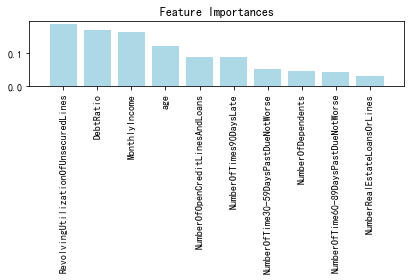

In [24]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

feat_labels = data.columns[1:]

forest = RandomForestClassifier(n_estimators=10000,
                                random_state=0,
                                n_jobs=-1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
#plt.savefig('./random_forest.png', dpi=300)
plt.show()

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
#forest是上面已经建好的模型
rfe = RFE(estimator=forest, n_features_to_select=8)
rfe.fit(X_train,y_train)
y_rfe_pred = rfe.predict(X_test)

In [ ]:
#使用混淆矩阵对RandomForest算法预测结果进行评估
confusion_matrix_output(y_test, y_rfe_pred)
#使用precision、recall 、f1-score、support对RandomForest算法预测结果进行评估
print(classification_report(y_test, y_rfe_pred))

### 本阶段课程意见反馈题(5分送分项，非必答)
#### 请同学围绕以下两点进行回答：
- 自身总结：请您对您自己在本周课程的学习，收获，技能掌握等方面进行一次总结 ，也包括有哪些方面存在哪些不足，欠缺，困惑。作为将来回顾学习路径时的依据。


- 课程反馈：请就知识点，进度，难易度，教学方式，考试方式及难易度等方面向我们反馈，督促我们进行更有效的改进。

<hr>
<center><h1>####答卷结束####</h1></center>